In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [94]:
df = pd.read_csv('../../Dataset/onehot.csv')
# drop Name Column
df.drop('Name', axis=1, inplace=True)

# randomize the rows
df = df.sample(frac=1).reset_index(drop=True)

df

,Class,sodium,extract,alcohol,water,glycerin,glycol,acid,dimethicone,fragrance,...,tomato,pyrus,tromethamine,hedera,helix,fillers,proprietary,microcapsules,https,pinterest
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1096,1,0,0,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1097,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1098,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.3, random_state=47)

In [96]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_predicted = knn.predict(X_test)


In [97]:
# Accuracy
accuracy_score(y_test, y_pred)

0.5242424242424243

In [98]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[178,   0],
       [ 75,  77]], dtype=int64)

In [99]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.70      1.00      0.83       178
           1       1.00      0.51      0.67       152

    accuracy                           0.77       330
   macro avg       0.85      0.75      0.75       330
weighted avg       0.84      0.77      0.76       330



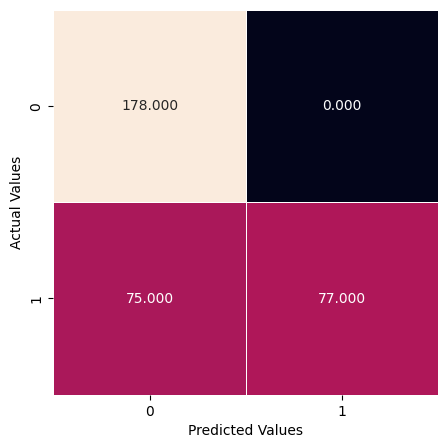

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='0.3f', linewidth=0.5, square=True, cbar=False)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
